# Blind source separation
The purpose of the project is to separate an image obtained as a sum of a two images into its components. 

The two images img1 and img2 summed together come from different dataset: mnist and fashion_mnist, respectively.

No preprocessing is allowed. The network takes in input the sum img1+img2 and returns the predicted components hat_img1 and hat_img2. 

The metric used to evaluate the project is the mean squared error between predicted and ground truth images.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist, fashion_mnist
from sklearn.model_selection import train_test_split

import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Here we load the two datasets, mnist and fashion mnist (both in grayscale).

For simplicity, the samples are padded to dimension (32,32).

In [ ]:
(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()
print(np.shape(mnist_x_train))
(fashion_mnist_x_train, fashion_mnist_y_train), (fashion_mnist_x_test, fashion_mnist_y_test) = fashion_mnist.load_data()
#normnalize in and pad
mnist_x_train = np.pad(mnist_x_train,((0,0),(2,2),(2,2)))/255.
print(np.shape(mnist_x_train))
mnist_x_test = np.pad(mnist_x_test,((0,0),(2,2),(2,2)))/255.
fashion_mnist_x_train = np.pad(fashion_mnist_x_train,((0,0),(2,2),(2,2)))/255.
fashion_mnist_x_test = np.pad(fashion_mnist_x_test,((0,0),(2,2),(2,2)))/255.

# Validation split for MNIST

mnist_x_val, mnist_x_test, mnist_y_val, mnist_y_test = train_test_split(mnist_x_test,mnist_y_test, test_size = 0.33)

# Validation split for F-MNIST

fashion_mnist_x_val, fashion_mnist_x_test, fashion_mnist_y_val, fashion_mnist_y_test = train_test_split(fashion_mnist_x_test,fashion_mnist_y_test, test_size = 0.33)

print(np.shape(mnist_x_val))
print(np.shape(fashion_mnist_x_val))

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
4431872/4422102 [==============================] - 0s 0us/step
(60000, 32, 32)
(6700, 32, 32)
(6700, 32, 32)


In [ ]:
print(np.shape(mnist_x_train))

(60000, 32, 32)


Here is a simple datagenerator.

In [ ]:
def datagenerator(x1,x2,batchsize,dataset_type):
    n1 = x1.shape[0]
    n2 = x2.shape[0]
    while True:
        num1 = np.random.randint(0, n1, batchsize)
        num2 = np.random.randint(0, n2, batchsize)

        x_data = (x1[num1] + x2[num2]) / 2.0

        if (dataset_type=='mix'):
          yield x_data, np.concatenate((x1[num1], x2[num2]), axis=2)

        if (dataset_type=='dig'):
          yield x_data, (x1[num1])

        if (dataset_type=='ind'):
          yield x_data, (x2[num2])


Here we define two generators, one for training and one for testing. You may possibly add an addition generator for validation, further splitting the dataset.

In [ ]:
batchsize = 128
inputShape = (32,32,1)

In [ ]:
train_generator = datagenerator(mnist_x_train,fashion_mnist_x_train,batchsize,'mix')
test_generator = datagenerator(mnist_x_test,fashion_mnist_x_test,1,'mix')
val_generator = datagenerator(mnist_x_val,fashion_mnist_x_val,batchsize,'mix')
train_generator_dig = datagenerator(mnist_x_train,fashion_mnist_x_train,batchsize,'dig')
test_generator_dig = datagenerator(mnist_x_test,fashion_mnist_x_test,batchsize,'dig')
val_generator_dig = datagenerator(mnist_x_val,fashion_mnist_x_val,batchsize,'dig')
train_generator_ind = datagenerator(mnist_x_train,fashion_mnist_x_train,batchsize,'ind')
test_generator_ind = datagenerator(mnist_x_test,fashion_mnist_x_test,batchsize,'ind')
val_generator_ind = datagenerator(mnist_x_val,fashion_mnist_x_val,batchsize,'ind')

Let us look at some input-output pairs

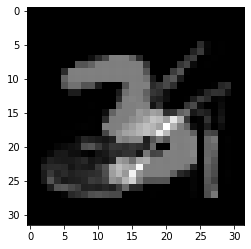

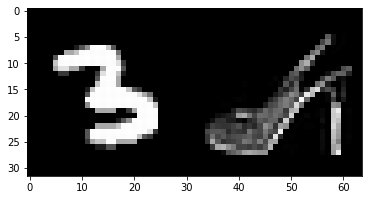

"plt.imshow(y[0][0], cmap='gray', interpolation='nearest')\nplt.show()\nplt.imshow(y[1][0], cmap='gray', interpolation='nearest')\nplt.show()"

In [ ]:
x, y = next(train_generator)
plt.imshow(x[0],cmap='gray', interpolation='nearest')
plt.show()
plt.imshow(y[0], cmap='gray', interpolation='nearest')
plt.show()
'''plt.imshow(y[0][0], cmap='gray', interpolation='nearest')
plt.show()
plt.imshow(y[1][0], cmap='gray', interpolation='nearest')
plt.show()'''

# Good work!

# Creazione train/test set


In [ ]:
'''x_train = []
y_train = []
x_test = []
y_test = []
x_val = []
y_val = []
y_train_mnist = []
y_train_f_mnist = []
y_val_mnist = []
y_val_f_mnist = []



train_size = 100000
test_size = 20000
val_size = 20000


for i in range(train_size):
    x, y = next(train_generator)
    x_train.append(np.reshape(x[0],(32,32,1)))
    y_train.append(np.reshape(y[0],(32,64,1)))
    y_train_f_mnist.append(y[0,0:32,32:64])
    y_train_mnist.append(y[0,0:32,0:32])

for i in range(test_size):
  x, y = next(test_generator)
  x_test.append(np.reshape(x[0],(32,32,1)))
  y_test.append(np.reshape(y[0],(32,64,1)))

for i in range(val_size):
  x, y = next(val_generator)
  x_val.append(np.reshape(x[0],(32,32,1)))
  y_val.append(np.reshape(y[0],(32,64,1)))
  y_val_f_mnist.append(y[0,0:32,32:64])
  y_val_mnist.append(y[0,0:32,0:32])
'''



'x_train = []\ny_train = []\nx_test = []\ny_test = []\nx_val = []\ny_val = []\ny_train_mnist = []\ny_train_f_mnist = []\ny_val_mnist = []\ny_val_f_mnist = []\n\n\n\ntrain_size = 100000\ntest_size = 20000\nval_size = 20000\n\n\nfor i in range(train_size):\n    x, y = next(train_generator)\n    x_train.append(np.reshape(x[0],(32,32,1)))\n    y_train.append(np.reshape(y[0],(32,64,1)))\n    y_train_f_mnist.append(y[0,0:32,32:64])\n    y_train_mnist.append(y[0,0:32,0:32])\n\nfor i in range(test_size):\n  x, y = next(test_generator)\n  x_test.append(np.reshape(x[0],(32,32,1)))\n  y_test.append(np.reshape(y[0],(32,64,1)))\n\nfor i in range(val_size):\n  x, y = next(val_generator)\n  x_val.append(np.reshape(x[0],(32,32,1)))\n  y_val.append(np.reshape(y[0],(32,64,1)))\n  y_val_f_mnist.append(y[0,0:32,32:64])\n  y_val_mnist.append(y[0,0:32,0:32])\n'

# Modello

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def build_unet(input_shape, n_ch=64, L=3, conv_per_L=3):
    # Default parameters are the same of the diagram above, a part of the 
    # number of channels, which is set to 32.
    # L = number of floors
    # conv_per_L = number of convolutions every level.
    x = layers.Input(shape=input_shape)

    # DOWN
    backup_layers = []
    h = x
    for l in range(L):

        # Each floor in the descent phase
        for c in range(conv_per_L):
            h = layers.Conv2D(n_ch, 3, 1, padding='same')(h)
            h = layers.ReLU()(h)

        if l < L-1: # We don't want to downsample at the last level
            # Downsample
            backup_layers.append(h) # save for the skip connection 
            h = layers.MaxPool2D(padding='same')(h)

            # Update the channels
            n_ch = n_ch * 2
    
    # UP (pay attention to do not double count the last level)
    for l in range(L-1):
        # Reduce the channels
        n_ch = n_ch // 2

        # Upsample
        h = layers.Conv2DTranspose(n_ch, 2, 2, padding='same')(h)

        # Concatenate
        h = layers.concatenate([h, backup_layers.pop(-1)])

        # Each floor in the up phase
        for c in range(conv_per_L):
            h = layers.Conv2D(n_ch, 3, 1, padding='same')(h)
            h = layers.ReLU()(h)
        
    # Output
    y = layers.Conv2D(1, 1)(h)

    return Model(x, y)

CB = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=10,
    verbose=1,
    mode="min",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0
)

es = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=20,
    mode="auto",
    restore_best_weights = True
)



In [ ]:
# MODEL FOR MNIST
unet_model_mnist = build_unet((32,32,1))

unet_model_mnist.compile(optimizer=Adam(learning_rate=1e-3),
                  loss='mae', # binary_crossentropy
                  metrics=['mse'])



In [ ]:
# TRAIN FOR MNIST

'''g = next(train_generator_dig)
plt.imshow(g[0][0], cmap='gray', interpolation='nearest')
plt.show()
plt.imshow(g[1][0], cmap='gray', interpolation='nearest')
plt.show()'''


unet_model_mnist.fit_generator(train_generator_dig,
 validation_data = val_generator_dig, verbose = 1, steps_per_epoch = 500,
 epochs = 300, validation_steps = 100,
 callbacks = [CB,es]
                   )

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  del sys.path[0]


500/500 [==============================] - 63s 93ms/step - loss: 0.0244 - mse: 0.0093 - val_loss: 0.0095 - val_mse: 0.0017 - lr: 0.0010
Epoch 2/300
500/500 [==============================] - 47s 94ms/step - loss: 0.0089 - mse: 0.0015 - val_loss: 0.0077 - val_mse: 0.0012 - lr: 0.0010
Epoch 3/300
500/500 [==============================] - 46s 93ms/step - loss: 0.0076 - mse: 0.0012 - val_loss: 0.0073 - val_mse: 0.0010 - lr: 0.0010
Epoch 4/300
500/500 [==============================] - 47s 93ms/step - loss: 0.0069 - mse: 0.0010 - val_loss: 0.0065 - val_mse: 9.1787e-04 - lr: 0.0010
Epoch 5/300
500/500 [==============================] - 47s 93ms/step - loss: 0.0065 - mse: 9.4410e-04 - val_loss: 0.0060 - val_mse: 8.3894e-04 - lr: 0.0010
Epoch 6/300
500/500 [==============================] - 47s 93ms/step - loss: 0.0061 - mse: 8.5708e-04 - val_loss: 0.0068 - val_mse: 9.3592e-04 - lr: 0.0010
Epoch 7/300
500/500 [==============================] - 47s 93ms/step - loss: 0.0061 - mse: 8.7689e-04 - 

In [ ]:
unet_model_mnist.save_weights('drive/MyDrive/mnist_prova.h5')

In [ ]:
# MODEL FOR F_MNIST

# MODEL FOR MNIST
unet_model_f_mnist = build_unet((32,32,1))

unet_model_f_mnist.compile(optimizer=Adam(learning_rate=1e-3),
                  loss='mae', # binary_crossentropy
                  metrics=['mse'])



In [ ]:
# TRAIN FOR F_MNIST

unet_model_f_mnist.compile(optimizer=Adam(learning_rate=1e-3),
                  loss='mae',
                  metrics=['mse'])
unet_model_f_mnist.fit_generator(train_generator_ind,
 validation_data = val_generator_ind, verbose = 1, steps_per_epoch = 1000,
 epochs = 60, validation_steps = 200, callbacks = [CB,es])

In [ ]:
unet_model_f_mnist.save_weights('drive/MyDrive/f_mnist.h5')

In [ ]:
# search for best parameters over the nets
from keras.models import load_model



def find_best_param(model,train_generator,val_generator,n, callbacks, test_generator):

  min = 0.001

  for i in range(n):

    model.compile(optimizer=Adam(learning_rate=1e-3),
                  loss='binary_crossentropy',
                  metrics=['mse'])
    
    model.fit_generator(train_generator,
                        validation_data = val_generator, verbose = 1, steps_per_epoch = 1000,
                        epochs = 20, validation_steps = 200, callbacks = callbacks)
    
    err = model.evaluate(test_generator,steps = 5000)

    if(err[1] < min):
      min = err[1]
      model.save('mymodel.h5')

    

    


In [ ]:
x = layers.Input(shape=(32,32))
l1 = unet_model_mnist(x)
'''for i in unet_model_mnist.layers:
  i.trainable = False'''

l2 = unet_model_f_mnist(x)
'''for i in unet_model_f_mnist.layers:
  i.trainable = False'''

y = layers.Concatenate(axis = 2)([l1,l2])


unet = Model(x,y)


unet.compile(optimizer=Adam(learning_rate=1e-3),
                  loss='mae',
                  metrics=['mse'])

unet.load_weights('/content/drive/MyDrive/potential_unet_model.h5')
'''unet.fit_generator(train_generator,
 validation_data = val_generator, verbose = 1, steps_per_epoch = 1000,
 epochs = 80, validation_steps = 100, callbacks = [CB,es])'''

'unet.fit_generator(train_generator,\n validation_data = val_generator, verbose = 1, steps_per_epoch = 1000,\n epochs = 80, validation_steps = 100, callbacks = [CB,es])'

In [ ]:
unet.save_weights('drive/MyDrive/unet_model.h5')


In [ ]:
unet_model_mnist = build_unet((32,32,1))
unet_model_mnist.load_weights('/content/drive/MyDrive/d1.hdf5')
unet_model_f_mnist = build_unet((32,32,1))
unet_model_f_mnist.load_weights('/content/drive/MyDrive/i1.hdf5')

x = layers.Input(shape=(32,32))
l1 = unet_model_mnist(x)
'''for i in unet_model_mnist.layers:
  i.trainable = False'''

l2 = unet_model_f_mnist(x)
'''for i in unet_model_f_mnist.layers:
  i.trainable = False'''

y = layers.Concatenate(axis = 2)([l1,l2])
unet = Model(x,y)

unet.compile(optimizer=Adam(learning_rate=1e-3/4),
                  loss='mae',
                  metrics=['mse'])

unet.fit_generator(train_generator,
 validation_data = val_generator, verbose = 1, steps_per_epoch = 2000,
 epochs = 200, validation_steps = 100, callbacks = [CB,es,chk])

In [ ]:
mse = np.zeros(10)
for i in range(10):
  mse[i] = unet.evaluate(test_generator, steps= 20000)[1]
mean = mse.mean()
std = mse.std()
print(mean)
print(std)


20000/20000 [==============================] - 106s 5ms/step - loss: 0.0032 - mse: 3.3892e-04
0.0003427236690185964
2.4148339146803218e-06


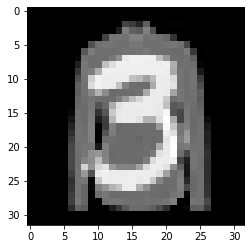

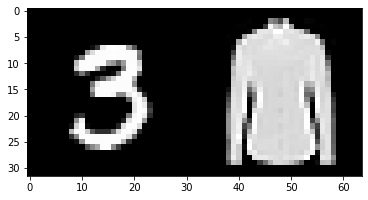

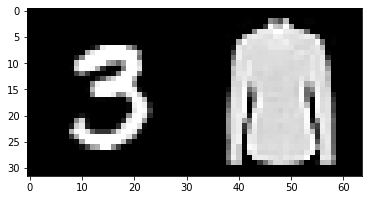

In [ ]:
generated,real = next(test_generator)
predict = unet.predict(generated)

plt.imshow(generated[0], cmap='gray', interpolation='nearest')
plt.show()

plt.imshow(real[0], cmap='gray', interpolation='nearest')
plt.show()
plt.imshow(np.reshape(predict[0],(32,64)), cmap='gray', interpolation='nearest')
plt.show()


In [ ]:
mse = np.zeros(10)
for i in range(10):
  mse[i] = model.evaluate(test_generator, steps= 20000)[1]
mean = mse.mean()
std = mse.std()
print(mean)
print(std)

20000/20000 [==============================] - 109s 5ms/step - loss: 0.0031 - mse: 3.3238e-04
0.0003310211235657334
3.5630668816088e-06


# Risultati

In [ ]:
def plot_history(model_history,keys):
    m,val_m = keys
    plt.plot(model_history.history[m])
    plt.plot(model_history.history[val_m])
    plt.ylabel(m)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

plot_history(model_history,['mse','val_mse']) # metric
plot_history(model_history,['loss','val_loss']) #loss

In [ ]:
loss, acc = unet.evaluate(x_test,y_test)
print("test loss = ", loss)
print("test accuracy = ", acc)

NameError: ignored